In [1]:
import pandas as pd
import os

# Define the directory where the files are stored
directory = 'data/'

# List of file names to process
files = [
    'abb.csv', 'araz.csv', 'bravo.csv', 'emanat.csv', 'express.csv', 
    'kb.csv', 'million.csv', 'oba.csv', 'ub.csv'
]

# Initialize an empty list to hold the standardized dataframes
dataframes = []

# Mapping of columns to the standardized format
columns_map = {
    'abb.csv': {'Store': 'name', 'Location': 'address', 'Lat': 'latitude', 'Lng': 'longitude'},
    'araz.csv': {'MarketName': 'name', 'AddressLine': 'address', 'Latitude': 'latitude', 'Longitude': 'longitude'},
    'bravo.csv': {'name': 'name', 'address': 'address', 'lat': 'latitude', 'lng': 'longitude'},
    'emanat.csv': {'Name': 'name', 'Address': 'address', 'Latitude': 'latitude', 'Longitude': 'longitude'},  # Missing Latitude & Longitude
    'express.csv': {'name': 'name', 'address': 'address', 'latitude': 'latitude', 'longitude': 'longitude'},
    'kb.csv': {'name': 'name', 'address': 'address', 'lat': 'latitude', 'lng': 'longitude'},
    'million.csv': {'id': 'name', 'address': 'address', 'latitude': 'latitude', 'longitude': 'longitude'},  # Using id as Name placeholder
    'oba.csv': {'Name': 'name', 'Address': 'address', 'Latitude': 'latitude', 'Longitude': 'longitude'},
    'ub.csv': {'Name': 'name', 'Address': 'address', 'Latitude': 'latitude', 'Longitude': 'longitude'},  # Missing Latitude & Longitude
}

# Loop through the files, standardize each one, and add a 'company' column
for file in files:
    # Determine the company name based on the file name
    company_name = os.path.splitext(file)[0].upper()  # Using the file name as the company name
    
    # Load the CSV file into a dataframe
    df = pd.read_csv(os.path.join(directory, file))
    
    # Convert columns to lowercase for consistent handling
    df.columns = df.columns.str.lower()
    
    # Log the columns found in the file before renaming
    print(f"Processing {file}: columns found -> {df.columns.tolist()}")
    
    # Map the columns to the standardized format
    if file in columns_map:
        df = df.rename(columns=columns_map[file])
        # Log the columns after renaming
        print(f"After renaming {file}: columns -> {df.columns.tolist()}")
    
    # Check if the required columns are present
    required_columns = ['name', 'address', 'latitude', 'longitude']
    if all(column in df.columns for column in required_columns):
        # Ensure only the standardized columns are selected
        df = df[required_columns]
        
        # Add the 'Company' column
        df['company'] = company_name
        
        # Append the standardized dataframe to the list
        dataframes.append(df)
    else:
        missing_columns = [col for col in required_columns if col not in df.columns]
        print(f"Skipping {file}: required columns missing -> {missing_columns}")

# Concatenate all dataframes into a single dataframe
if dataframes:  # Ensure there is at least one dataframe
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Save the combined dataframe to a new CSV file
    output_file = os.path.join(directory, 'data.csv')
    combined_df.to_csv(output_file, index=False)
    
    print(f"Data has been combined and saved to {output_file}")
else:
    print("No dataframes were combined due to missing columns.")


Processing abb.csv: columns found -> ['name', 'address', 'latitude', 'longitude', 'type']
After renaming abb.csv: columns -> ['name', 'address', 'latitude', 'longitude', 'type']
Processing araz.csv: columns found -> ['name', 'latitude', 'longitude', 'category', 'address', 'working hours', 'phone']
After renaming araz.csv: columns -> ['name', 'latitude', 'longitude', 'category', 'address', 'working hours', 'phone']
Processing bravo.csv: columns found -> ['name', 'lat', 'lng', 'location_type', 'phone', 'address', 'working_hours', 'map_link']
After renaming bravo.csv: columns -> ['name', 'latitude', 'longitude', 'location_type', 'phone', 'address', 'working_hours', 'map_link']
Processing emanat.csv: columns found -> ['name', 'address']
After renaming emanat.csv: columns -> ['name', 'address']
Skipping emanat.csv: required columns missing -> ['latitude', 'longitude']
Processing express.csv: columns found -> ['name', 'fullname', 'address', 'latitude', 'longitude']
After renaming express.csv

In [2]:
import pandas as pd

# Load the CSV file
file_path = 'data/data.csv'
data = pd.read_csv(file_path)

# Display basic information about the data
data_info = data.info()

# Display the first few rows of the data to understand its structure
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       5122 non-null   object
 1   address    5105 non-null   object
 2   latitude   5119 non-null   object
 3   longitude  5119 non-null   object
 4   company    5123 non-null   object
dtypes: object(5)
memory usage: 200.2+ KB


(None,
                       name                                            address  \
 0   İdeal market (Hökməli)  Abşeron r., Bakı-Şamaxı şossesi 12-ci km. (İde...   
 1           Respublika DYP  Abşeron r., Xırdalan ş., Sahə 1287 ev 4 (Respu...   
 2    Bazarstore (Höküməli)  Abşeron ray Höküməli qəs Bakı Şamaxı şossesi 1...   
 3      Araz market (Saray)  Abşeron rayonu, Saray qəsəbəsi (Saray DYP post...   
 4  Araz Market (Məhəmmədi)  Abşeron rayonu, Məhəmmədi kəndi, GöyQurşağı-Mə...   
 
              latitude          longitude company  
 0  40.446374069275095  49.70095361852881     ABB  
 1          40.4467429         49.7746598     ABB  
 2   40.44131784918866  49.74818651483471     ABB  
 3           40.523947          49.687323     ABB  
 4           40.511532          49.941772     ABB  )

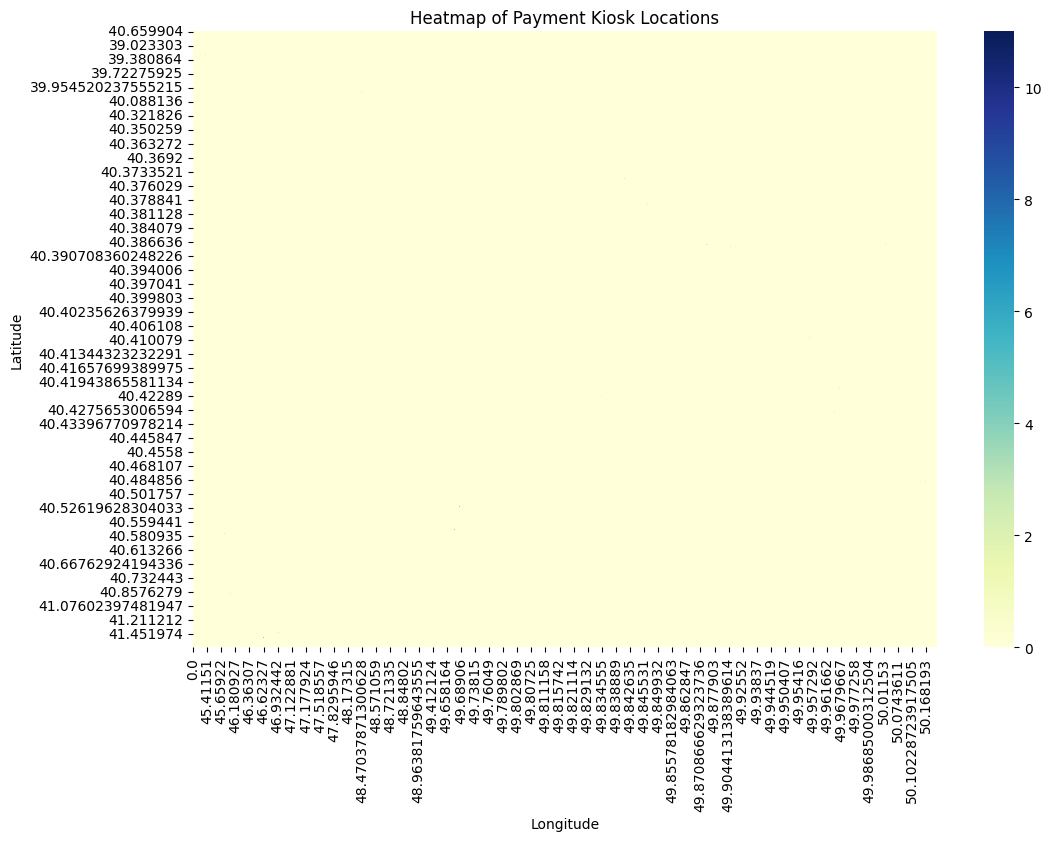

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('data/data.csv')

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='latitude', columns='longitude', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Add titles and labels
plt.title('Heatmap of Payment Kiosk Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
